## Importing modules and library / packages

In [231]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

## importing dataset

In [232]:
dataset=pd.read_csv('coffee.csv')

## Preprocess the dataset

In [233]:
dataset.Date = pd.to_datetime(dataset.Date,yearfirst=True)
dataset.set_index('Date',inplace=True)
df = dataset.asfreq('b','ffill')

In [234]:
dataset.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640,ETB
2000-01-04,116.25,120.50,115.75,116.25,5492,ETB
2000-01-05,115.00,121.00,115.00,118.60,6165,ETB
2000-01-06,119.00,121.40,116.50,116.85,5094,ETB
2000-01-07,117.25,117.75,113.80,114.15,6855,ETB


In [235]:
dataset.shape

(5713, 6)

## Analyse the data

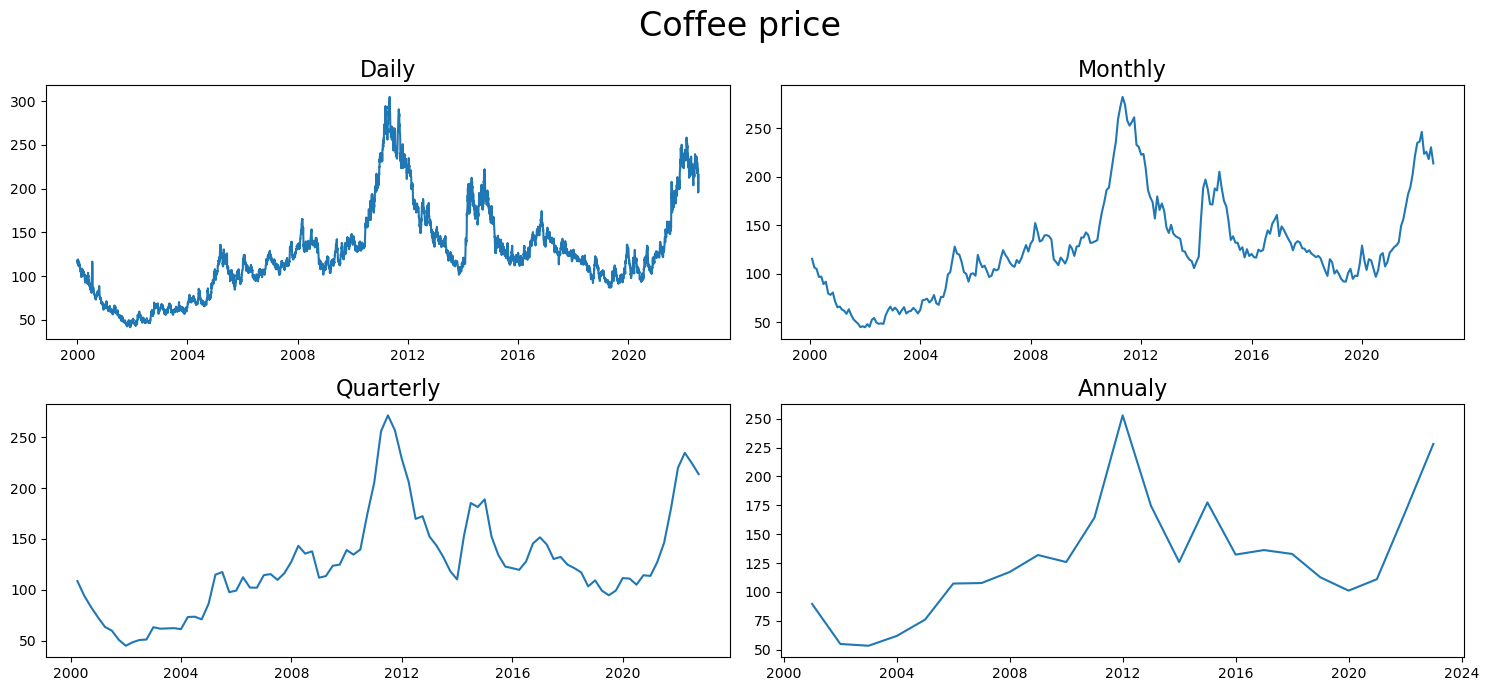

In [236]:
fig,axes = plt.subplots(2,2,figsize=[15,7])
fig.suptitle('Coffee price ',size=24)
## resampling to daily frequency (original data)
axes[0,0].plot(dataset.Close)
axes[0,0].set_title("Daily",size=16)

## resampling to monthly frequency 
axes[0,1].plot(dataset.Close.resample('M').mean())
axes[0,1].set_title("Monthly",size=16)

## resmapling to quarterly frequency 
axes[1,0].plot(dataset.Close.resample('Q').mean())
axes[1,0].set_title('Quarterly',size=16)

## resampling to annualy frequency
axes[1,1].plot(dataset.Close.resample('A').mean())
axes[1,1].set_title('Annualy',size=16)

plt.tight_layout()
plt.show()

In [237]:
# dataset['Date'] = pd.to_datetime(dataset.Date)

## Exclude the " Currency column/Attributes from the dataset"

In [238]:
dataset.drop('Currency',axis = 1, inplace = True)

In [239]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640
2000-01-04,116.25,120.50,115.75,116.25,5492
2000-01-05,115.00,121.00,115.00,118.60,6165
2000-01-06,119.00,121.40,116.50,116.85,5094
2000-01-07,117.25,117.75,113.80,114.15,6855


In [240]:
dataset.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [241]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [242]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5713 entries, 2000-01-03 to 2022-07-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5713 non-null   float64
 1   High    5713 non-null   float64
 2   Low     5713 non-null   float64
 3   Close   5713 non-null   float64
 4   Volume  5713 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 267.8 KB


In [243]:
dataset.describe()

,Open,High,Low,Close,Volume
count,5713.000000,5713.000000,5713.000000,5713.000000,5713.000000
mean,126.717973,128.288682,125.241994,126.660851,8786.940312
std,50.187811,50.775044,49.472449,50.114862,9610.508653
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.550000,99.900000,97.550000,98.500000,61.000000
50%,120.050000,121.400000,118.750000,120.050000,6987.000000
75%,144.000000,145.450000,142.100000,143.700000,14478.000000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


In [244]:
print(len(dataset))

5713


<AxesSubplot:xlabel='Date'>

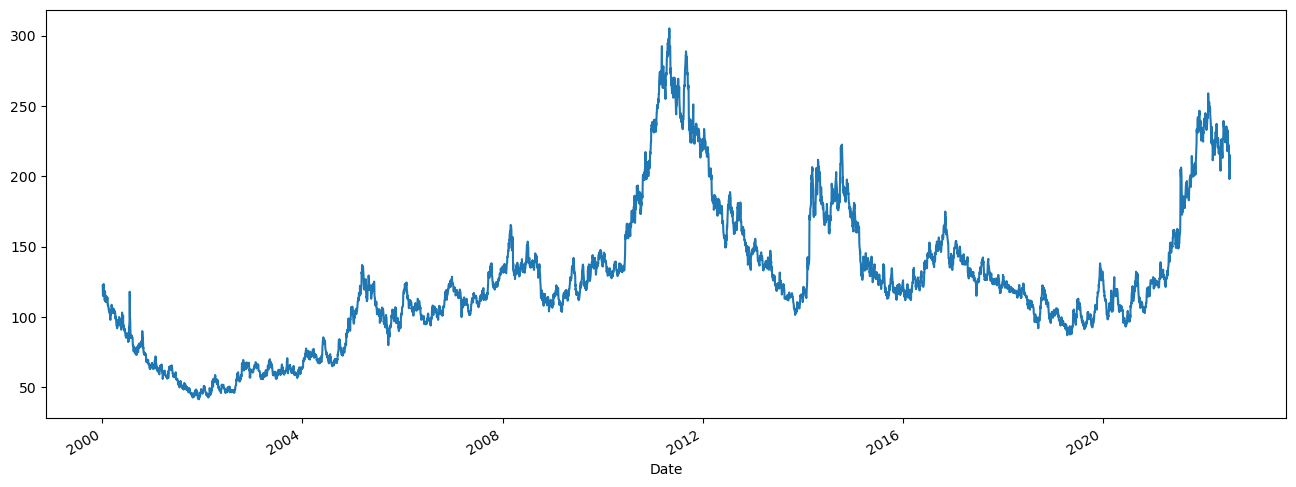

In [245]:
dataset['Open'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

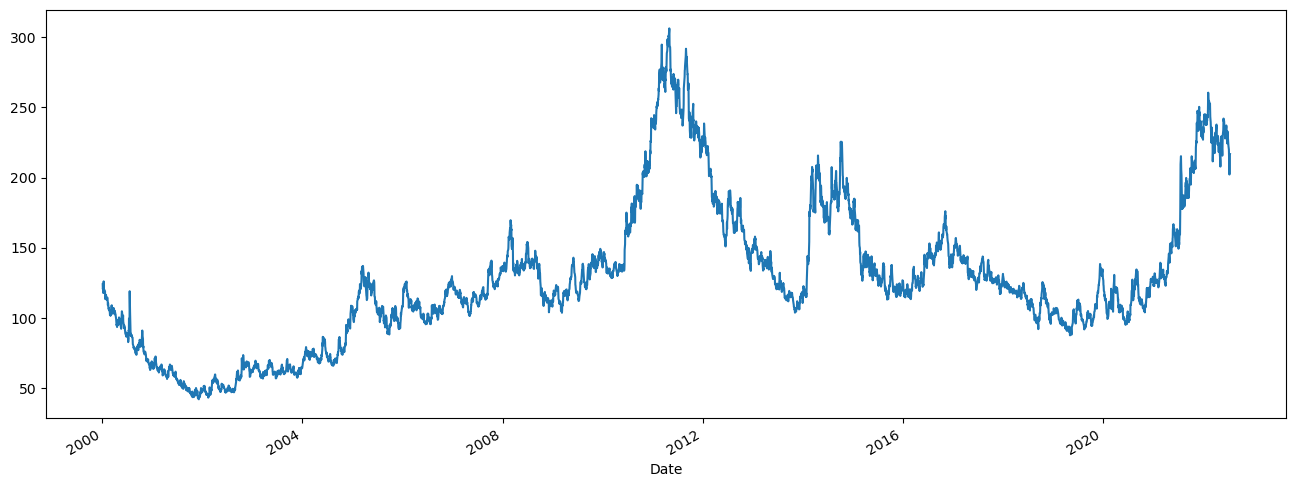

In [246]:
dataset['High'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

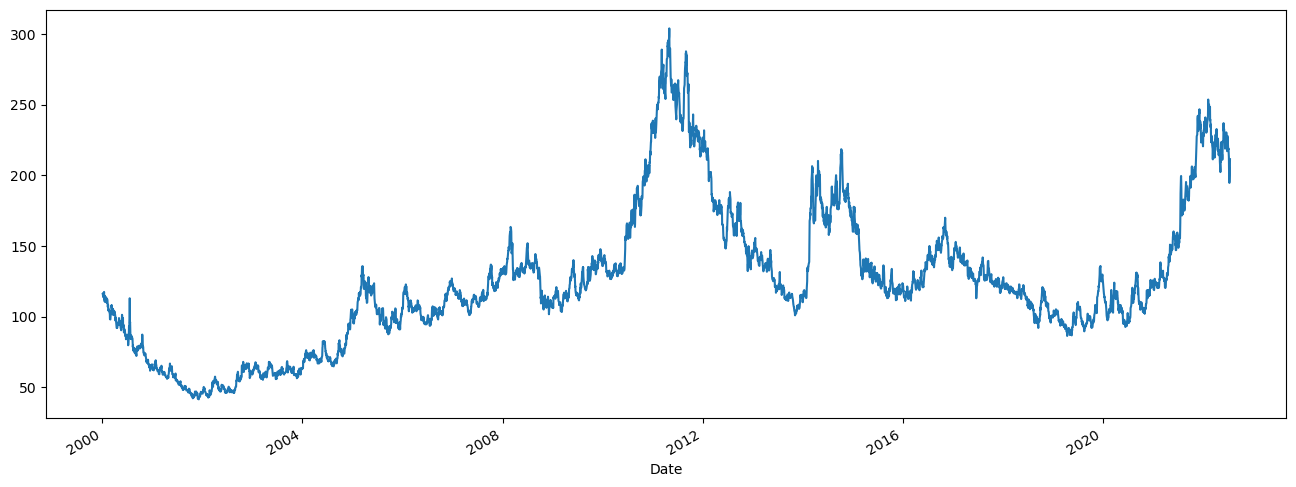

In [247]:
dataset['Low'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

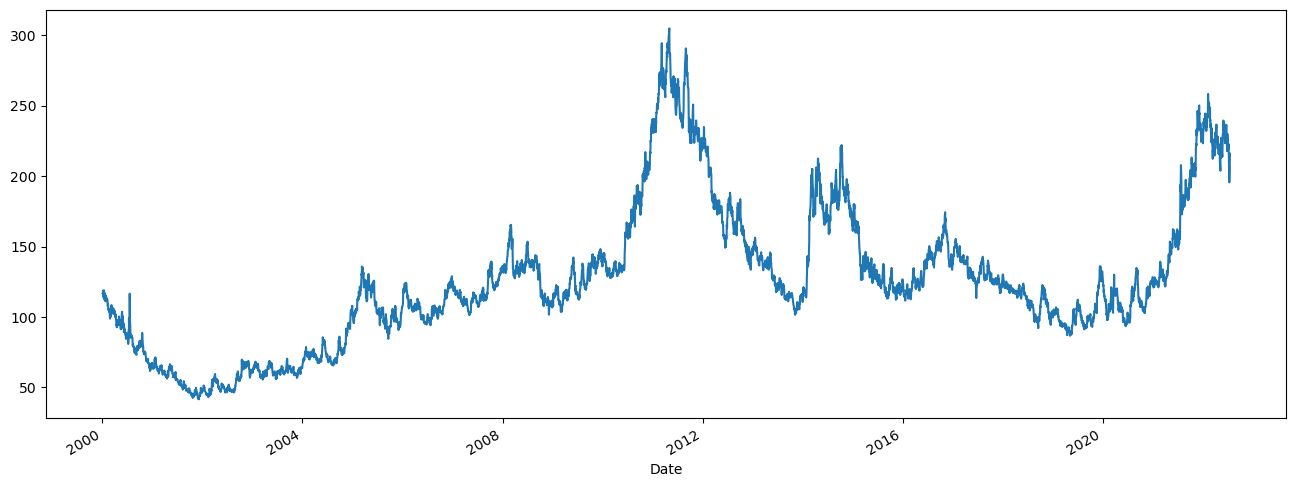

In [248]:
dataset['Close'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

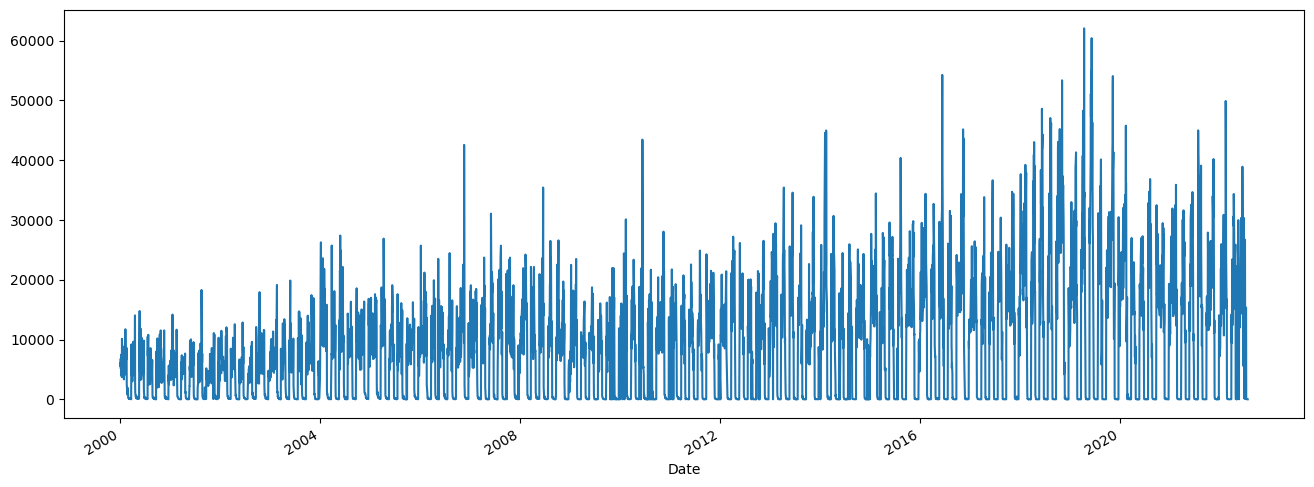

In [249]:
dataset['Volume'].plot(figsize=(16,6))

## prepare the data for training

In [250]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

## split the data into train dataset and test dataset

In [251]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state = 0)

In [252]:
X_train.shape

(4570, 4)

In [253]:
X_test.shape

(1143, 4)

In [254]:
print(X_train)

              Open    High     Low  Volume
Date                                      
2005-10-06   94.50   95.45   93.25    7353
2015-06-15  131.05  131.60  127.20   23419
2010-10-11  181.50  182.40  176.35    8993
2014-05-02  202.00  202.00  201.80       4
2015-11-09  118.05  119.70  116.95   29240
...            ...     ...     ...     ...
2019-06-12   97.15   99.20   96.75   31368
2012-11-15  148.25  149.35  144.50    8556
2006-08-23  106.75  109.50  106.75    1393
2010-05-25  131.90  133.30  130.60   13588
2010-11-01  202.80  203.25  197.65   11340

[4570 rows x 4 columns]


In [255]:
print(y_train)

Date
2005-10-06     93.50
2015-06-15    127.80
2010-10-11    178.65
2014-05-02    200.60
2015-11-09    117.75
               ...  
2019-06-12     99.05
2012-11-15    149.00
2006-08-23    107.35
2010-05-25    132.75
2010-11-01    197.70
Name: Close, Length: 4570, dtype: float64


## Define and Train (fit) the linear regression model using training data

In [256]:
reg_model = LinearRegression()

In [257]:
reg_model.fit(X_train,y_train)

LinearRegression()

## Predict the coffee market price on the testing dataset

In [258]:
predicted=reg_model.predict(X_test)
#print(X_test)

In [259]:
predicted.shape

(1143,)

In [260]:
dframe=pd.DataFrame(y_test,predicted)

In [261]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [262]:
print(dfr)

            Actual   Predicted
Date                          
2011-06-27  250.15  249.842414
2004-10-19   72.95   73.094380
2013-06-28  120.00  119.089499
2013-10-17  114.70  114.715828
2003-12-10   63.00   63.076352
...            ...         ...
2002-04-11   54.95   55.374860
2000-05-18   91.50   92.449355
2014-05-05  202.40  197.369535
2004-03-29   72.40   72.653643
2019-10-17   92.90   93.448617

[1143 rows x 2 columns]


In [263]:
dfr.head(20)

,Actual,Predicted
Date,,
2011-06-27,250.15,249.842414
2004-10-19,72.95,73.094380
2013-06-28,120.00,119.089499
2013-10-17,114.70,114.715828
2003-12-10,63.00,63.076352
2006-05-30,98.75,97.646362
2001-03-19,59.90,60.325628
2003-07-15,61.00,62.033066
2012-05-30,164.40,163.593702


## Evaluate the model performance on the testing dataset

In [264]:
reg_model.score(X_test,y_test)

0.999483005543467

In [265]:
import math

In [266]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.7836857523171399


In [267]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))


Mean Squared  Error: 1.2871422039135747


In [268]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Root Mean Squared Error: 1.1345228970424417


In [269]:
graph=dfr.head(30)


<AxesSubplot:xlabel='Date'>

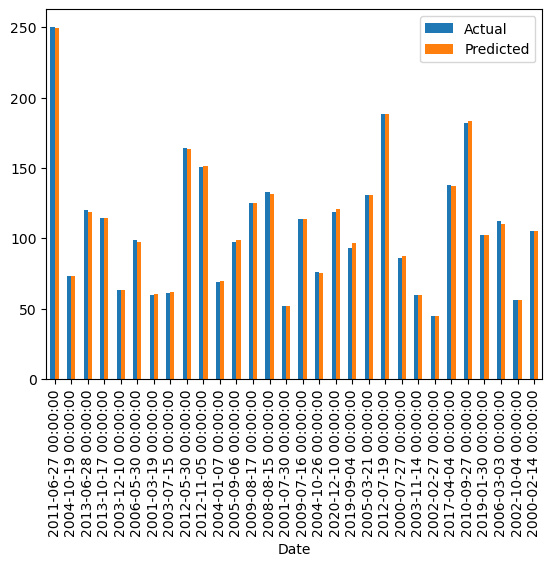

In [270]:
# plot the actual price and predicted price in the form of bar graph
graph.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

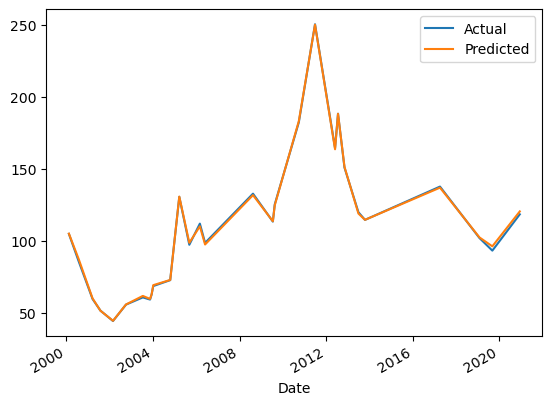

In [271]:
# plot the actual price and predicted price in the form of line graph
graph.plot(kind='line')

<AxesSubplot:ylabel='Density'>

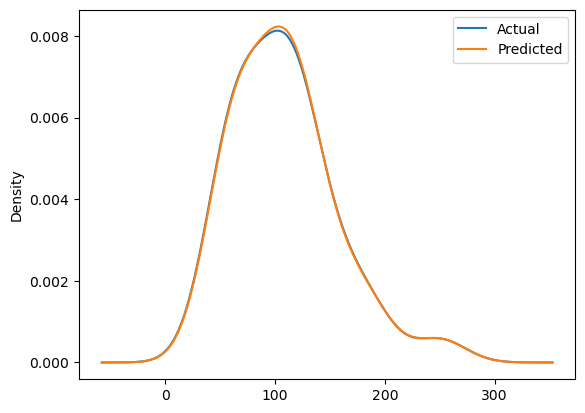

In [272]:
# plot the actual price and predicted price in the form of kernel density estimate
graph.plot(kind='kde')

In [273]:
prediction=reg_model.predict([[116.25,120.50,115.75,5492]])
prediction

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([119.07316551])

In [274]:
pwd

'C:\\Users\\hp\\Desktop\\Python Final Project'